In [1]:
import lmfit
import rampy as rp #Charles' libraries and functions

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from Modules.custom_funx import *

In [2]:
def load_files(dir_name):
    '''
    Load all files from the directory path
    The dataframe output and column naming is based on the temparature.
    With index as the x axis or Frequency
    '''
    init_temp = 10
    c = 0
    all_data = pd.DataFrame()
    for file in os.listdir(dir_name):
        filename = file
        if '_XY' in filename:
            full_file = os.path.join(dir_name,filename)
            # print(file_num)
            data_temp = init_temp+c
            # print(filename + ' : '+str(data_temp))
            c += 3 
            colx = "x_"+str(data_temp)
            coly = "y_"+str(data_temp)
            col_nam = [colx , coly]
            data = pd.read_csv(full_file, delimiter = "\t", names = col_nam)
            all_data = pd.concat([all_data,data[coly]], axis=1)
            
    all_data = pd.concat([data[colx], all_data], axis=1)    
    all_data = all_data.rename(columns = {colx:'x'})
    return all_data

In [3]:
dir_name = 'Data/Thylakoids/qg27/'
data = load_files(dir_name) # The output comes as Dataframe
# print(data) # To visualize all the data
# print(data.columns) # To check the columns

# To plot
# fig = px.line(data_frame=data, x=data['x'], y=data['y_10'])
# fig.show()

data_array = data.to_numpy() # converting all the datas to numpy 2D array for easy data handing and manipulation
print(np.shape(data_array))

# # Visualize by potting
# # plt.figure()
# # plt.plot(x, data_array)
# # plt.show()

# Choosing the region of interest
roi = np.array([(1347,1365),(1774,1800)])
print(np.shape(roi))
roi[1,1]


(6430, 27)
(2, 2)


1800

In [ ]:
nCols = np.shape(data_array)
nCols[1]

In [ ]:

y_base_new = np.zeros((940,1))

for i in range(1,nCols[1]-1):
    y = data_array[:,i]
    x = data_array[:,0]
    y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)
    print(np.shape(y_corr))
    # # Trim the data
    x_fit = x[np.where((x > roi[0,0])&(x < roi[1,1]))]
    y_fit = y_corr[np.where((x > roi[0,0])&(x < roi[1,1]))]
    
    # print(np.shape(y_fit))

## Nomralize
    y_fit_norm_intensity = rp.normalise(y_fit,x=x_fit,method="intensity")
    y_base_new = np.hstack((y_base_new,y_fit_norm_intensity)) # workking

np.shape(y_base_new)

# rp.normalise(y_base_new,x=x_fit,method="intensity")

In [4]:
# Spectral Correction over a numpy Array
nd = np.shape(data_array)
corr_spectra = np.zeros((nd[0],1))
print(nd[0])
for i in range(1,nd[1]-1):
    y = data_array[:,i]
    x = data_array[:,0]
    y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)
    corr_spectra = np.hstack((corr_spectra,y_corr))
print(np.shape(corr_spectra))


6430
(6430, 26)


In [5]:
print(corr_spectra)

[[  0.         -21.06480606 -22.32550673 ... -43.46705588 -43.52724017
  -42.03557911]
 [  0.         -21.05192127 -22.31185011 ... -43.44035884 -43.50048852
  -42.00973421]
 [  0.         -21.0390417  -22.29819901 ... -43.41367266 -43.47374775
  -41.98389985]
 ...
 [  0.           1.56485427   1.59252229 ...   1.95509176   1.9332892
    1.86404645]
 [  0.           1.56506122   1.59278572 ...   1.95642941   1.93463564
    1.86533449]
 [  0.           1.56524965   1.59307072 ...   1.95777028   1.93600533
    1.86663568]]


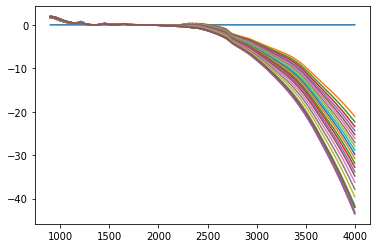

In [14]:
plt.plot(x,corr_spectra)
# plt.xlim([1400,1800])
# plt.ylim([-0.01, 1.0])

In [12]:
# Trimming the spectra
x_fit = x[np.where((x > roi[0,0])&(x < roi[1,1]))]
y_fit = corr_spectra[np.where((x > roi[0,0])&(x < roi[1,1]))]


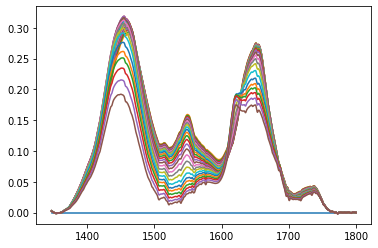

In [15]:
plt.plot(x_fit,y_fit)

(940, 26)


d:\Users\avrat\anaconda3\lib\site-packages\rampy\spectranization.py:212: RuntimeWarning: invalid value encountered in true_divide
  y = y/np.max(y,axis=0)


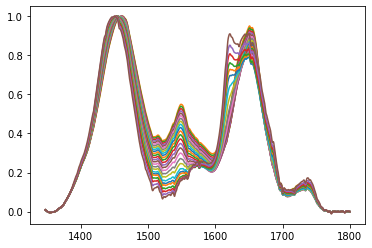

In [17]:
y_fit_norm_intensity = rp.normalise(y_fit,x=x_fit,method="intensity")
print(np.shape(y_fit_norm_intensity))
plt.plot(x_fit,y_fit_norm_intensity)

In [18]:
np.shape(y_base)

(6430, 1)